In [23]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.metrics import accuracy_score 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import numpy.random as r 
import matplotlib.pyplot as plt 
import cv2

import glob
import matplotlib.gridspec as gridspec #A grid layout to place subplots within a figure.
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import seaborn as sn #for visualization

## Data Pre-Processing 

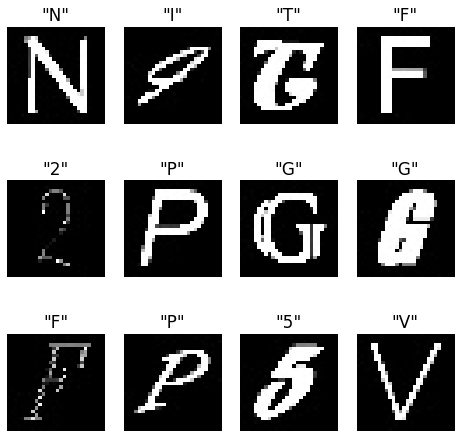

In [24]:
characters = glob.glob("dataset_characters/**/*.jpg")
cols=4
rows=3
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)

# create a random list of images will be displayed
np.random.seed(45)
rand = np.random.randint(0,len(characters),size=(cols*rows))

# Plot example images
for i in range(cols*rows):
    fig.add_subplot(grid[i])
    image = load_img(characters[rand[i]])
    label = characters[rand[i]].split(os.path.sep)[-2]
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

In [25]:
X=[]
labels =[]

for image_path in characters:
    image = cv2.imread(image_path, 0) #0 = grayscale
    image = cv2.resize(image, (28, 28)) 
    X.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels.append(label)

    
print(image.shape)
print(image.size)
 
X = np.array(X, dtype = "float")
print(X[10000])
print(labels[10000])
print(len(labels))

(28, 28)
784
[[  2.   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   3.   0.   0.   2.   1.   0.   2.   0.   0.   0.   0.]
 [  0.   5.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   3.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   1.   0.   2.   3.   0.   1.   4.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   5.   0. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 252. 252. 255. 253.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   2.   0.   0. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 254. 255. 255. 255. 253. 255.   2.   3.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   4. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 252. 253. 255.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   2.   0.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1. 255. 255. 255.  41.   0

In [26]:
#print(X[0])
y = np.array(labels)
#y = y.reshape(y.shape[0],1)
print(y.shape)

(37623,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31979, 28, 28)
(5644, 28, 28)
(31979,)
(5644,)


In [29]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(penalty= "l2", C = 0.0001)

In [30]:
'''
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
'''

X_train = X_train
X_test = X_test


num_pixels = 784 #28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)


(31979, 784)
(5644, 784)


In [31]:
model.fit(X_train, y_train)

/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001)

In [32]:
model.score(X_test, y_test)#how good the model is 

0.8883770375620128

Text(65.0, 0.5, 'Truth')

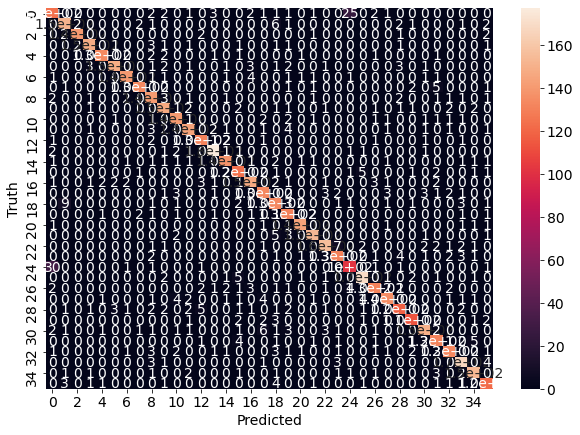

In [33]:
#confusion matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
print(metrics.classification_report(y_test, y_predicted)) 

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       166
           1       0.89      0.89      0.89       169
           2       0.97      0.95      0.96       148
           3       0.94      0.92      0.93       161
           4       0.96      0.94      0.95       143
           5       0.95      0.89      0.92       167
           6       0.95      0.91      0.93       154
           7       0.96      0.92      0.94       145
           8       0.81      0.89      0.85       158
           9       0.86      0.90      0.88       163
           A       0.89      0.91      0.90       155
           B       0.89      0.89      0.89       162
           C       0.90      0.93      0.91       141
           D       0.94      0.94      0.94       188
           E       0.91      0.90      0.90       154
           F       0.84      0.89      0.86       139
           G       0.91      0.86      0.89       170
           H       0.87    

In [35]:
acc_train_logreg2 = []
acc_test_logreg2 = []
cVals= [0.0001, 0.001, 0.01, 0.1, 1, 10]
c_logreg2 = []

In [36]:
def logreg2_model(c , X_train, y_train, X_test, y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    # TODO - Create the Logistic Regression model object as described above and save it to logreg2 - 5 points
    logreg2 = linear_model.LogisticRegression(penalty = "l2", C=c, solver = 'saga')
    
    # TODO - Fit the model on the training set - 5 points
    logreg2.fit(X_train, y_train)
    
    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test =logreg2.score(X_test, y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)

In [37]:
for c in cVals:
    logreg2_model(c, X_train, y_train, X_test, y_test)

/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on training data = 0.964821
Accuracy on test data = 0.893161


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on training data = 0.965384
Accuracy on test data = 0.893338


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on training data = 0.965477
Accuracy on test data = 0.893692


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on training data = 0.965477
Accuracy on test data = 0.893870


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on training data = 0.965384
Accuracy on test data = 0.894047
Accuracy on training data = 0.965477
Accuracy on test data = 0.893515


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


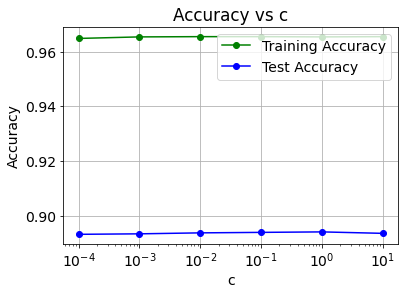

In [38]:
plt.plot(cVals, acc_train_logreg2, color="green", marker="o")
plt.plot(cVals, acc_test_logreg2, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')